In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB          
from sklearn.model_selection import train_test_split  
from joblib import dump  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score # untuk mengetahui performa model pada cross validation
from joblib import load
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_resesi.csv')
df.head()

,Date,User,Isi
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...


In [3]:
print ('Dataset size:', df.shape)
print ('Columns are:', df.columns)

Dataset size: (3820, 3)
Columns are: Index(['Date', 'User', 'Isi'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820 entries, 0 to 3819
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3820 non-null   object
 1   User    3820 non-null   object
 2   Isi     3820 non-null   object
dtypes: object(3)
memory usage: 89.7+ KB


Cleaning Data

In [5]:
df.drop_duplicates(subset=None, inplace=True) #menghapus data yang sama
df.to_csv ('resesi1.csv', index = None, header=True)
df

,Date,User,Isi
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...
...,...,...,...
2915,2023-02-06 05:43:02+00:00,Miduk17,Jokowi memilih fokus agar bagaimana Indonesia ...
2916,2023-02-06 05:40:06+00:00,zulfiarrahman,@Jayandaru2020 @radixwp @BuYungBin1 @catz_nada...
2917,2023-02-06 05:37:28+00:00,_zenzs,@Stockbit to financial influencer: Resesi rese...
2918,2023-02-06 05:33:27+00:00,radixwp,@zulfiarrahman @BuYungBin1 @catz_nada2 @aescul...


In [7]:
df = pd.read_csv('resesi.csv') #sesudah di labeling
df

,Date,User,Isi,Sentiment
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif
...,...,...,...,...
1010,2023-02-06 05:43:02+00:00,Miduk17,Jokowi memilih fokus agar bagaimana Indonesia ...,positif
1011,2023-02-06 05:40:06+00:00,zulfiarrahman,@Jayandaru2020 @radixwp @BuYungBin1 @catz_nada...,NaN
1012,2023-02-06 05:37:28+00:00,_zenzs,@Stockbit to financial influencer: Resesi rese...,negatif
1013,2023-02-06 05:33:27+00:00,radixwp,@zulfiarrahman @BuYungBin1 @catz_nada2 @aescul...,NaN


In [8]:
df.dropna(inplace=True) #menghapus NaN/ data kosong

In [9]:
df

,Date,User,Isi,Sentiment
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif
...,...,...,...,...
1008,2023-02-06 05:50:25+00:00,heraldindo,Gemparan Resesi Global Pengaruhi Ekonomi Dunia...,netral
1009,2023-02-06 05:43:12+00:00,Muh_N_UD,"RT @yosnggarang: ""Vokalis"" wacana penundaan Pe...",netral
1010,2023-02-06 05:43:02+00:00,Miduk17,Jokowi memilih fokus agar bagaimana Indonesia ...,positif
1012,2023-02-06 05:37:28+00:00,_zenzs,@Stockbit to financial influencer: Resesi rese...,negatif


In [10]:
df.to_csv ('resesi.csv', index = None, header=True)
df

,Date,User,Isi,Sentiment
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif
...,...,...,...,...
1008,2023-02-06 05:50:25+00:00,heraldindo,Gemparan Resesi Global Pengaruhi Ekonomi Dunia...,netral
1009,2023-02-06 05:43:12+00:00,Muh_N_UD,"RT @yosnggarang: ""Vokalis"" wacana penundaan Pe...",netral
1010,2023-02-06 05:43:02+00:00,Miduk17,Jokowi memilih fokus agar bagaimana Indonesia ...,positif
1012,2023-02-06 05:37:28+00:00,_zenzs,@Stockbit to financial influencer: Resesi rese...,negatif


In [11]:
df = pd.read_csv('resesi.csv') 

Case Folding

In [12]:
def casefolding (text):
    text = text.lower()
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', text)
    text = re.sub(r'@[^\s]+','', text)
    text = re.sub(r'inv[^\s]+','', text)
    text = re.sub(r'#[A-Za-z0-9]+','', text)
    text = re.sub(r'[0-9]+','', text)
    text = re.sub(r'[-+]?[0-9]+', '', text)  
    text = re.sub(r'rt+','', text)
    text = re.sub(r'[^\w\s]','', text)
    text = re.sub(r'_[A-Za-z0-9]+','', text)
    text = text.strip()
    return text

In [13]:
raw_sample = df['Isi'].iloc[5]
case_folding = casefolding(raw_sample)

print ('Raw data\t: ', raw_sample)
print ('Case folding\t: ', case_folding)

Raw data	:  RT @Anggita_lung: Dengan pencabutan status PPKM, optimis kondisi ekonomi Indonesia akan tetap tumbuh positif beraba pada kisaran 4,75-5,35…
Case folding	:  dengan pencabutan status ppkm optimis kondisi ekonomi indonesia akan tetap tumbuh positif beraba pada kisaran


Tokenization

In [14]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [15]:
raw_sample = df['Isi'].iloc[5]
case_folding = casefolding(raw_sample)
tokenize =  tokenization(case_folding)

print ('Raw data\t: ', raw_sample)
print ('Case folding\t: ', case_folding)
print ('Tokenization\t: ', tokenize)

Raw data	:  RT @Anggita_lung: Dengan pencabutan status PPKM, optimis kondisi ekonomi Indonesia akan tetap tumbuh positif beraba pada kisaran 4,75-5,35…
Case folding	:  dengan pencabutan status ppkm optimis kondisi ekonomi indonesia akan tetap tumbuh positif beraba pada kisaran
Tokenization	:  ['dengan', 'pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'akan', 'tetap', 'tumbuh', 'positif', 'beraba', 'pada', 'kisaran']


Stopword Removal

In [16]:
stopword = nltk.corpus.stopwords.words('indonesian')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [17]:
raw_sample = df['Isi'].iloc[5]
case_folding = casefolding(raw_sample)
tokenize =  tokenization(case_folding)
stopwords = remove_stopwords(tokenize)

print ('Raw data\t: ', raw_sample)
print ('Case folding\t: ', case_folding)
print ('Tokenization\t: ', tokenize)
print ('Stopwords Removal\t: ', stopwords)

Raw data	:  RT @Anggita_lung: Dengan pencabutan status PPKM, optimis kondisi ekonomi Indonesia akan tetap tumbuh positif beraba pada kisaran 4,75-5,35…
Case folding	:  dengan pencabutan status ppkm optimis kondisi ekonomi indonesia akan tetap tumbuh positif beraba pada kisaran
Tokenization	:  ['dengan', 'pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'akan', 'tetap', 'tumbuh', 'positif', 'beraba', 'pada', 'kisaran']
Stopwords Removal	:  ['pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'tumbuh', 'positif', 'beraba', 'kisaran']


In [18]:
stopwords = df [['Isi']]
def fit_stopwords(text):
    text = np.array (text)
    text = ' '.join (text)
    return text

In [19]:
raw_sample = df['Isi'].iloc[5]
case_folding = casefolding(raw_sample)
tokenize =  tokenization(case_folding)
stopwords = remove_stopwords(tokenize)
fit =fit_stopwords (stopwords)

print ('Raw data\t: ', raw_sample)
print ('Case folding\t: ', case_folding)
print ('Tokenization\t: ', tokenize)
print ('Stopwords Removal\t: ', stopwords)
print ('Word combination\t: ', fit)

Raw data	:  RT @Anggita_lung: Dengan pencabutan status PPKM, optimis kondisi ekonomi Indonesia akan tetap tumbuh positif beraba pada kisaran 4,75-5,35…
Case folding	:  dengan pencabutan status ppkm optimis kondisi ekonomi indonesia akan tetap tumbuh positif beraba pada kisaran
Tokenization	:  ['dengan', 'pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'akan', 'tetap', 'tumbuh', 'positif', 'beraba', 'pada', 'kisaran']
Stopwords Removal	:  ['pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'tumbuh', 'positif', 'beraba', 'kisaran']
Word combination	:  pencabutan status ppkm optimis kondisi ekonomi indonesia tumbuh positif beraba kisaran


Stemming

In [20]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

In [21]:
raw_sample = df['Isi'].iloc[5]
case_folding = casefolding(raw_sample)
tokenize =  tokenization(case_folding)
stopwords = remove_stopwords(tokenize)
fit =fit_stopwords (stopwords)
textstemming = stemming(fit)

print ('Raw data\t: ', raw_sample)
print ('Case folding\t: ', case_folding)
print ('Tokenization\t: ', tokenize)
print ('Stopwords Removal\t: ', stopwords)
print ('Word combination\t: ', fit)
print ('Stemming\t: ', textstemming)

Raw data	:  RT @Anggita_lung: Dengan pencabutan status PPKM, optimis kondisi ekonomi Indonesia akan tetap tumbuh positif beraba pada kisaran 4,75-5,35…
Case folding	:  dengan pencabutan status ppkm optimis kondisi ekonomi indonesia akan tetap tumbuh positif beraba pada kisaran
Tokenization	:  ['dengan', 'pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'akan', 'tetap', 'tumbuh', 'positif', 'beraba', 'pada', 'kisaran']
Stopwords Removal	:  ['pencabutan', 'status', 'ppkm', 'optimis', 'kondisi', 'ekonomi', 'indonesia', 'tumbuh', 'positif', 'beraba', 'kisaran']
Word combination	:  pencabutan status ppkm optimis kondisi ekonomi indonesia tumbuh positif beraba kisaran
Stemming	:  cabut status ppkm optimis kondisi ekonomi indonesia tumbuh positif aba kisar


In [22]:
def text_preprocessing_process(text):
    text = casefolding (text)
    text = tokenization (text)
    text = remove_stopwords (text)
    text = fit_stopwords(text)
    text = stemming (text)
    return text

In [23]:
%%time
df['cleartweet'] = df['Isi'].apply(text_preprocessing_process)

CPU times: total: 1min 6s
Wall time: 1min 7s


In [24]:
df

,Date,User,Isi,Sentiment,cleartweet
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral,sesuai target dunia ancam resesi
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif,nyemplung sampe minus mustahil sih sampe q unt...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral,prediksi tumbuh lambat core indonesia p
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral,ancam resesi global butuh bijak fiskal moneter...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif,lewat resesi global
...,...,...,...,...,...
1001,2023-02-06 05:50:25+00:00,heraldindo,Gemparan Resesi Global Pengaruhi Ekonomi Dunia...,netral,gempar resesi global pengaruh ekonomi dunia ci...
1002,2023-02-06 05:43:12+00:00,Muh_N_UD,"RT @yosnggarang: ""Vokalis"" wacana penundaan Pe...",netral,vokalis wacana tunda milu kian beambahskrg ket...
1003,2023-02-06 05:43:02+00:00,Miduk17,Jokowi memilih fokus agar bagaimana Indonesia ...,positif,jokowi pilih fokus indonesia on the right trac...
1004,2023-02-06 05:37:28+00:00,_zenzs,@Stockbit to financial influencer: Resesi rese...,negatif,to financial influencer resesi resesi resesi r...


In [25]:
df.to_csv ('final_preprocessing.csv', index = None, header=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1006 non-null   object
 1   User        1006 non-null   object
 2   Isi         1006 non-null   object
 3   Sentiment   1006 non-null   object
 4   cleartweet  1006 non-null   object
dtypes: object(5)
memory usage: 39.4+ KB


In [27]:
le = LabelEncoder()
df.Sentiment = le.fit_transform(df.Sentiment.values)

In [28]:
df.head(10)

,Date,User,Isi,Sentiment,cleartweet
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,1,sesuai target dunia ancam resesi
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,0,nyemplung sampe minus mustahil sih sampe q unt...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,1,prediksi tumbuh lambat core indonesia p
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,1,ancam resesi global butuh bijak fiskal moneter...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,2,lewat resesi global
5,2023-02-06 04:29:02+00:00,catatankaqihati,RT @Anggita_lung: Dengan pencabutan status PPK...,2,cabut status ppkm optimis kondisi ekonomi indo...
6,2023-02-06 04:22:32+00:00,soloposdotcom,Resesi Global Disebut Tak Terlalu Berdampak ke...,1,resesi global dampak ri respons rhenald kasali
7,2023-02-06 04:17:59+00:00,DdMulyadi2,RT @CoklatBenkBenk: Harga Minyak Diprediksi Je...,0,harga minyak prediksi jeblok usd barel analis ...
8,2023-02-06 04:12:19+00:00,Indiah752834981,Itu bukan prestasi nomor 1 didunia tapi byk ne...,0,prestasi nomor dunia byk negara resesi
9,2023-02-06 04:09:38+00:00,Di0nAngelo,RT @CoklatBenkBenk: Harga Minyak Diprediksi Je...,0,harga minyak prediksi jeblok usd barel analis ...


In [29]:
print ('Total Sentiment Positif, Negatif, dan Netral:', df.shape[0], 'Sentiment\n')
print ('Label tersebut terdiri dari: ')
print ('- [1] netral\t: ', df[df.Sentiment == 1].shape[0], 'data')
print ('- [0] negatif\t: ', df[df.Sentiment == 0].shape[0], 'data')
print ('- [2] positif\t: ', df[df.Sentiment == 2].shape[0], 'data\n')

Total Sentiment Positif, Negatif, dan Netral: 1006 Sentiment

Label tersebut terdiri dari: 
- [1] netral	:  432 data
- [0] negatif	:  387 data
- [2] positif	:  187 data



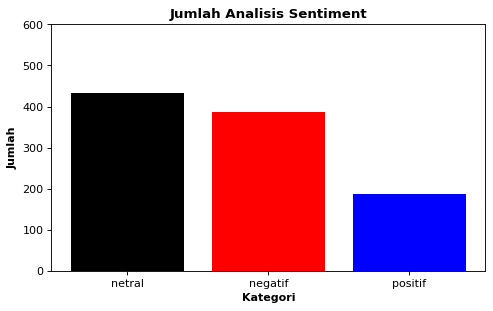

In [30]:
height = df['Sentiment'].value_counts()
labels = ('netral','negatif','positif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Jumlah Analisis Sentiment', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['black', 'red', 'blue'])
plt.xticks(y_pos, labels)
plt.show()

In [31]:
df = pd.read_csv('final_preprocessing.csv')
df.head()

,Date,User,Isi,Sentiment,cleartweet
0,2023-02-06 05:07:39+00:00,ridwanibnuhasan,@BigAlphaID Sesuai dengan target. Dan mungkin ...,netral,sesuai target dunia ancam resesi
1,2023-02-06 04:59:29+00:00,faliqhan,@BigAlphaID Rasanya untuk nyemplung sampe minu...,negatif,nyemplung sampe minus mustahil sih sampe q unt...
2,2023-02-06 04:56:21+00:00,COREIndonesia,Lalu bagaimana dengan tahun ini? meskipun dipr...,netral,prediksi tumbuh lambat core indonesia p
3,2023-02-06 04:48:33+00:00,Windutmiy,@garudadidada10 ancaman resesi global yang mem...,netral,ancam resesi global butuh bijak fiskal moneter...
4,2023-02-06 04:29:56+00:00,dynarfitrianti1,@garudadidada10 kita pasti mampu melewati rese...,positif,lewat resesi global


In [32]:
df.shape

(1006, 5)

In [33]:
print(df['Sentiment'].value_counts())

netral     432
negatif    387
positif    187
Name: Sentiment, dtype: int64


In [34]:
df = df.astype({'Sentiment' : 'category'})
df = df.astype({'cleartweet' : 'string'})
df.dtypes

Date            object
User            object
Isi             object
Sentiment     category
cleartweet      string
dtype: object

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['cleartweet'])
bow_transformer.vocabulary_

{'sesuai': 1379,
 'target': 1499,
 'dunia': 405,
 'ancam': 70,
 'resesi': 1282,
 'nyemplung': 1069,
 'sampe': 1328,
 'minus': 962,
 'mustahil': 995,
 'sih': 1391,
 'untun': 1612,
 'halo': 536,
 'udah': 1599,
 'ilang': 590,
 'nih': 1060,
 'isu': 631,
 'prediksi': 1213,
 'tumbuh': 1588,
 'lambat': 822,
 'core': 306,
 'indonesia': 604,
 'global': 509,
 'butuh': 263,
 'bijak': 209,
 'fiskal': 453,
 'moneter': 977,
 'kelola': 719,
 'risiko': 1300,
 'lewat': 844,
 'cabut': 267,
 'status': 1437,
 'ppkm': 1210,
 'optimis': 1091,
 'kondisi': 776,
 'ekonomi': 420,
 'positif': 1203,
 'aba': 0,
 'kisar': 758,
 'dampak': 321,
 'ri': 1294,
 'respons': 1290,
 'rhenald': 1293,
 'kasali': 698,
 'harga': 548,
 'minyak': 963,
 'jeblok': 654,
 'usd': 1620,
 'barel': 148,
 'analis': 69,
 'pasar': 1125,
 'khawatir': 749,
 'prestasi': 1215,
 'nomor': 1063,
 'byk': 266,
 'negara': 1018,
 'hadap': 531,
 'plt': 1184,
 'bupati': 257,
 'tingkat': 1547,
 'produksi': 1225,
 'pangan': 1114,
 'mimika': 955,
 'berita'

In [36]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['aba' 'abai' 'abangkehidupan' ... 'yupyup' 'zepp' 'zodiak']


In [37]:
text_bow = bow_transformer.transform(df['cleartweet'])
print(text_bow)

  (0, 70)	1
  (0, 405)	1
  (0, 1282)	1
  (0, 1379)	1
  (0, 1499)	1
  (1, 536)	1
  (1, 590)	1
  (1, 631)	1
  (1, 962)	1
  (1, 995)	1
  (1, 1060)	1
  (1, 1069)	1
  (1, 1282)	1
  (1, 1328)	2
  (1, 1391)	1
  (1, 1599)	1
  (1, 1612)	1
  (2, 306)	1
  (2, 604)	1
  (2, 822)	1
  (2, 1213)	1
  (2, 1588)	1
  (3, 70)	1
  (3, 209)	1
  (3, 263)	1
  :	:
  (1003, 667)	1
  (1003, 1084)	1
  (1003, 1173)	1
  (1003, 1174)	1
  (1003, 1296)	1
  (1003, 1453)	1
  (1003, 1537)	1
  (1003, 1563)	1
  (1004, 446)	1
  (1004, 450)	1
  (1004, 568)	1
  (1004, 609)	1
  (1004, 1282)	4
  (1004, 1509)	1
  (1004, 1552)	1
  (1005, 536)	1
  (1005, 590)	1
  (1005, 962)	1
  (1005, 995)	1
  (1005, 1069)	1
  (1005, 1282)	1
  (1005, 1328)	2
  (1005, 1391)	1
  (1005, 1599)	1
  (1005, 1612)	1


In [38]:
X = text_bow.toarray()
print (X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1006, 1688)

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 1499)	0.5925785535800462
  (0, 1379)	0.6481366492939087
  (0, 1282)	0.12324821914195506
  (0, 405)	0.3611834320405549
  (0, 70)	0.2883157064344359
  (1, 1612)	0.3026011120535862
  (1, 1599)	0.23421316144324364
  (1, 1391)	0.2491508230203518
  (1, 1328)	0.5299707647715232
  (1, 1282)	0.05511332848680878
  (1, 1069)	0.3026011120535862
  (1, 1060)	0.2649853823857616
  (1, 995)	0.3026011120535862
  (1, 962)	0.19353449803724793
  (1, 631)	0.24105667016855034
  (1, 590)	0.3026011120535862
  (1, 536)	0.25905726548382957
  (2, 1588)	0.35452540585713466
  (2, 1213)	0.3706643365098564
  (2, 822)	0.5718343982459724
  (2, 604)	0.20705091445257764
  (2, 306)	0.6058506631576465
  (3, 1300)	0.3686734194438028
  (3, 1282)	0.0766790193754217
  (3, 977)	0.4210080786489732
  :	:
  (1003, 1173)	0.28911663036160623
  (1003, 1084)	0.28911663036160623
  (1003, 667)	0.21811222831212004
  (1003, 604)	0.10468391353062517
  (1003, 472)	0.30631508487731485
  (1003, 455)	0.2891166303616062

In [40]:
dd=pd.DataFrame(data=tweet_tfidf.toarray(),columns=tokens)
dd

,aba,abai,abangkehidupan,abis,about,academy,aceh,actionnya,acu,ad,...,yoi,yooooo,you,youre,yues,yuk,yuli,yupyup,zepp,zodiak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Classification!!!!

In [41]:
from sklearn.model_selection import train_test_split #split data

x_train, x_test, y_train, y_test = train_test_split(X, df.Sentiment,test_size=0.2, random_state=40)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(804, 1688)
(202, 1688)
(804,)
(202,)


In [43]:
y_train.values

['negatif', 'negatif', 'negatif', 'netral', 'negatif', ..., 'positif', 'positif', 'negatif', 'netral', 'netral']
Length: 804
Categories (3, object): ['negatif', 'netral', 'positif']

In [44]:
print('jumlah proporsi kelas')
y_train.value_counts()

jumlah proporsi kelas


netral     336
negatif    308
positif    160
Name: Sentiment, dtype: int64

In [45]:
#SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=40, sampling_strategy={'netral':336, 'negatif':336, 'positif':336})
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [47]:
#kondisi data train akhir
print ('Jumlah proporsi kelas (setelah dilakukan SMOTE)')
pd.Series(y_train_res).value_counts()

Jumlah proporsi kelas (setelah dilakukan SMOTE)


negatif    336
netral     336
positif    336
Name: Sentiment, dtype: int64

In [48]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train_res,y_train_res)

In [49]:
prediction = model.predict(x_test)
predict= pd.Series(prediction)
print(predict.to_string())

0       netral
1       netral
2      negatif
3      negatif
4      positif
5      positif
6      negatif
7       netral
8       netral
9      positif
10      netral
11     negatif
12     negatif
13      netral
14     positif
15     positif
16      netral
17      netral
18      netral
19     negatif
20     negatif
21     negatif
22     negatif
23      netral
24     negatif
25     negatif
26     positif
27      netral
28      netral
29      netral
30      netral
31     positif
32     negatif
33      netral
34      netral
35      netral
36      netral
37     negatif
38     negatif
39      netral
40     negatif
41      netral
42     positif
43     negatif
44      netral
45     positif
46     positif
47      netral
48     negatif
49     positif
50      netral
51     negatif
52     positif
53     negatif
54     negatif
55     negatif
56      netral
57      netral
58     negatif
59     negatif
60      netral
61     positif
62     positif
63     negatif
64     positif
65     positif
66     neg

In [50]:
true_label= pd.Series(y_test)
print(true_label.to_string())

744     netral
900     netral
954    negatif
605    negatif
71      netral
341    negatif
911    negatif
283     netral
452     netral
885    positif
243     netral
196     netral
14     negatif
535    negatif
136    negatif
336     netral
471     netral
988     netral
989     netral
827    negatif
203    negatif
851    negatif
128    negatif
209     netral
42     negatif
95     negatif
560    positif
907     netral
277     netral
445     netral
176     netral
442    negatif
666    negatif
530     netral
411     netral
361     netral
715     netral
284    negatif
932    negatif
64      netral
965    negatif
880     netral
996    negatif
791    negatif
985     netral
514     netral
583    positif
734     netral
677    negatif
788    positif
365     netral
9      negatif
418     netral
135     netral
984     netral
520    negatif
393    negatif
725     netral
532    negatif
141    negatif
435     netral
579     netral
194     netral
104     netral
474     netral
556    positif
637    neg

precision:  0.726s
recall:  0.785s
recall:  0.729s
accuracy:   0.757
              precision    recall  f1-score   support

     negatif       0.83      0.85      0.84        79
      netral       0.90      0.66      0.76        96
     positif       0.45      0.85      0.59        27

    accuracy                           0.76       202
   macro avg       0.73      0.79      0.73       202
weighted avg       0.81      0.76      0.77       202



Text(50.722222222222214, 0.5, 'Label sebenarnya')

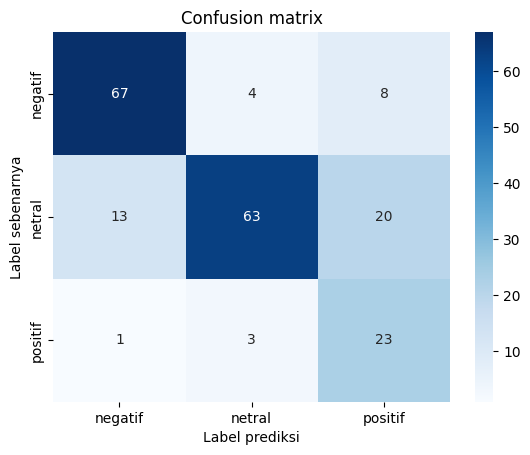

In [51]:
from time import time
from pandas import DataFrame
from sklearn import metrics
import seaborn as sn

model = MultinomialNB().fit(x_train_res, y_train_res)
y_pred = model.predict(x_test)

precision = metrics.precision_score(y_test, y_pred, average="macro", zero_division=0)
print("precision:  %0.3fs" % precision)

recall = metrics.recall_score(y_test, y_pred, average="macro", zero_division=0)
print("recall:  %0.3fs" % recall)

f1 = metrics.f1_score(y_test, y_pred, average="macro", zero_division=0)
print("recall:  %0.3fs" % f1)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred, target_names=['negatif','netral','positif']))

columns = ['negatif','netral','positif']
confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

Test

In [52]:
user_data = ["lewat resesi global"]
print(user_data)

['lewat resesi global']


In [53]:
test_1_unseen = bow_transformer.transform(user_data)
data=test_1_unseen.toarray()
print("diubah menjadi array: \n ",data)

diubah menjadi array: 
  [[0 0 0 ... 0 0 0]]


In [54]:
prediction_unseen = model.predict(data)
print(prediction_unseen)

['positif']
